<a href="https://colab.research.google.com/github/FengYou97/DataScienceData/blob/master/WhatIsCooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
df_train = pd.read_json('https://raw.githubusercontent.com/FengYou97/DataScienceData/master/train.json')
df_test = pd.read_json('https://raw.githubusercontent.com/FengYou97/DataScienceData/master/test.json')
#import data using pandas 

In [0]:
%matplotlib inline

import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import seaborn as sns
sns.set_context('talk')

In [0]:
df_train.head()
#example of how train data looks like

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [0]:
df_test.head()
#display the sample of test data

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [0]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)
#count ingredients in each unique cuisine
#i.e. for all italian dishes, 1240 dishes used onions as an ingredient

In [0]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
from sklearn.feature_extraction.text import CountVectorizer
#We can conveniently tell the count vectorizer which features it should 
#accept and let him build the matrix with 1s and 0s when ingredients 
#are present in a single step as follows:

cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
#We can check the shape of that matrix:

X.shape

(39774, 3010)

In [0]:
print(list(cv.vocabulary_.keys())[:120])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

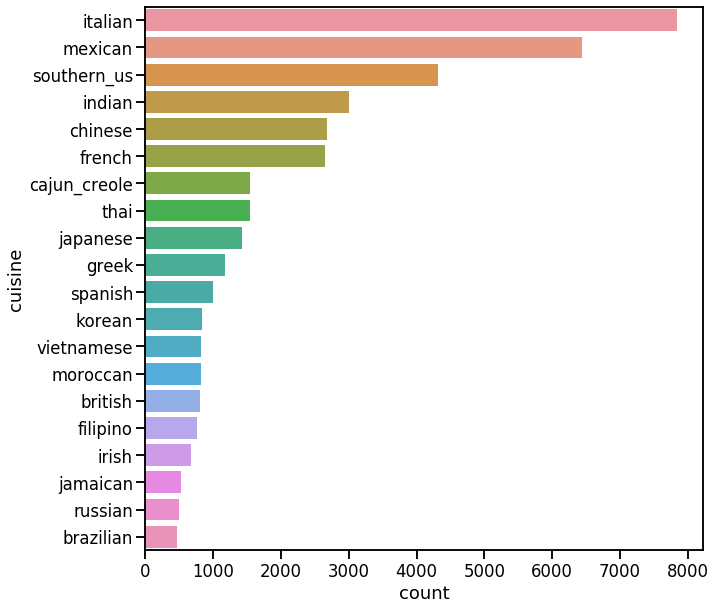

In [0]:
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(y = 'cuisine', data = df_train, order = df_train.cuisine.value_counts(ascending=False).index)

In [0]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logistic.score(X_test, y_test)

0.7874292897548711

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

my_decisiontree = DecisionTreeClassifier(random_state=3)

my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)


score_dt = accuracy_score(y_test, y_predict_dt)


print(score_dt)

0.6380892520427404


In [0]:
my_RandomForest = RandomForestClassifier(n_estimators = 30, bootstrap = True, random_state=2)

my_RandomForest.fit(X_train,y_train)
y_predict_randomt = my_RandomForest.predict(X_test)
score_randomt = accuracy_score(y_test, y_predict_randomt)
print(score_randomt)

0.7407919547454431


In [0]:
import pandas as pd

from sklearn import pipeline,ensemble,preprocessing,feature_extraction,metrics
from sklearn.model_selection import train_test_split

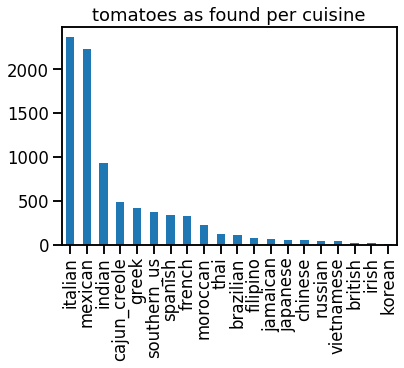

In [0]:
indices = df_train['all_ingredients'].str.contains('tomatoes')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='tomatoes as found per cuisine')
#check frequency of individual ingredient 

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/train.json') as data_file:    
  train_data = json.load(data_file)
#read data file using json extension

In [0]:
all_cuisines = []
all_ingredients = []
#count unique cusine and ingredients and input into list of array
for recipe in train_data:
    all_cuisines.append(recipe['cuisine'])
    all_ingredients.extend(recipe['ingredients'])
    
all_cuisines = np.array(all_cuisines)
all_ingredients = np.array(all_ingredients)

unique_cuisines, cuisine_counts = np.unique(all_cuisines, return_counts=True)
unique_ingredients, ingredient_counts = np.unique(all_ingredients, return_counts=True)

print(unique_cuisines.size)
unique_cuisines

20


array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype='<U12')

In [0]:
print(len(unique_ingredients))
for i in range(10):
    print(unique_ingredients[i])

6714
(    oz.) tomato sauce
(   oz.) tomato paste
(10 oz.) frozen chopped spinach
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(14 oz.) sweetened condensed milk
(14.5 oz.) diced tomatoes
(15 oz.) refried beans
1% low-fat buttermilk
1% low-fat chocolate milk
1% low-fat cottage cheese


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


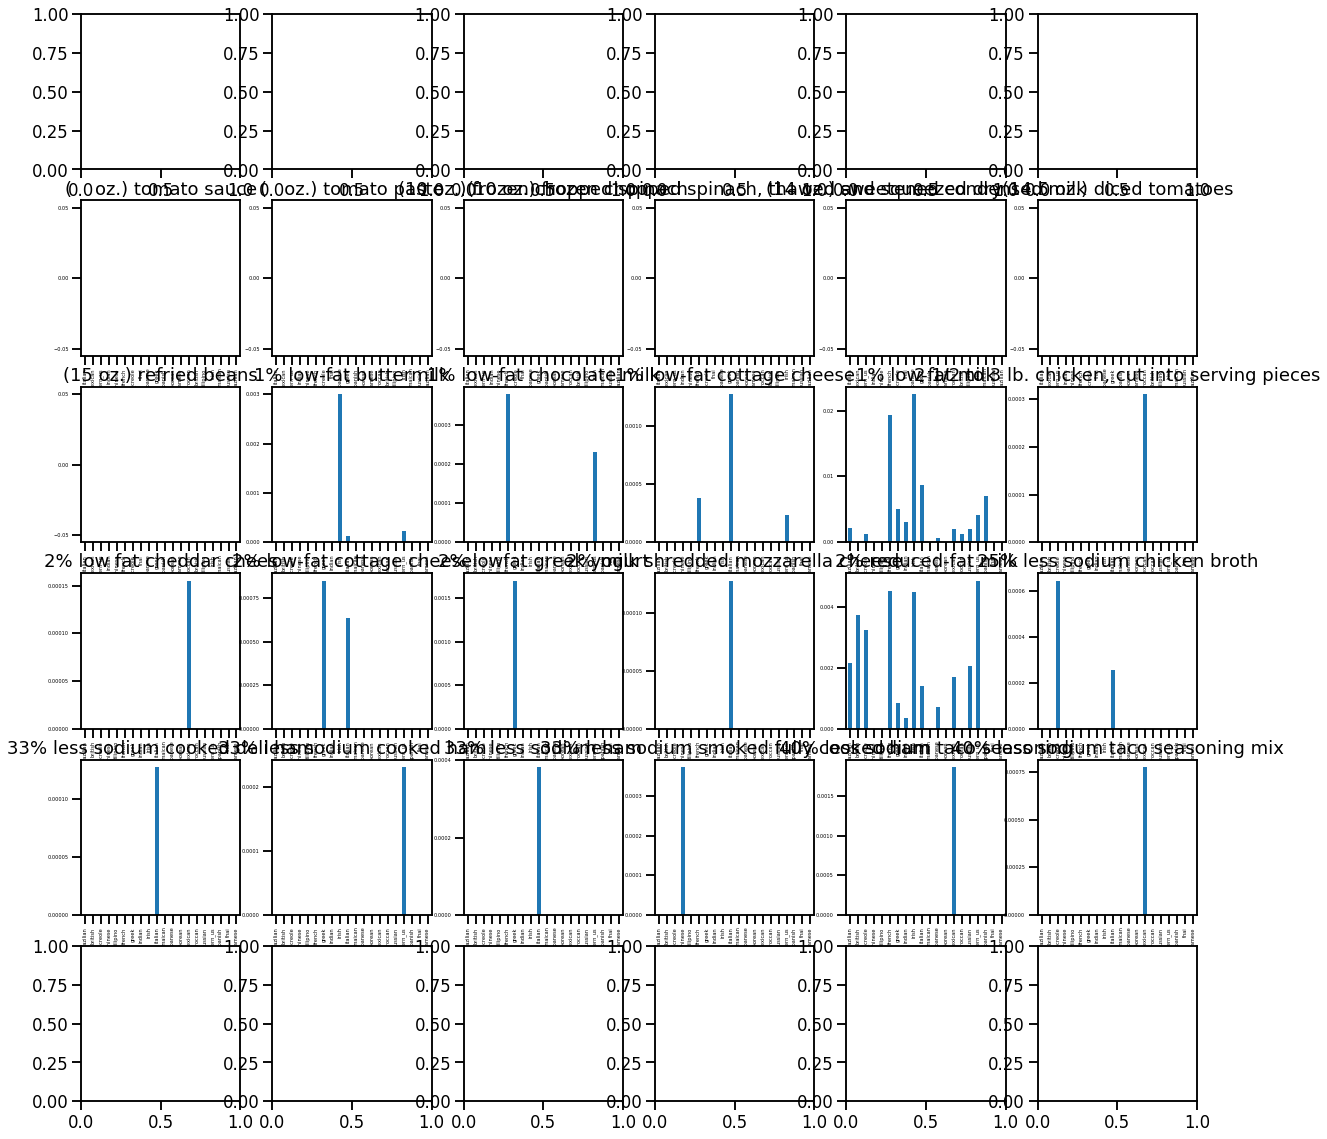

In [0]:
#display 36 plot of select unique ingredients with frequency in each cuisine
fig, axes = plt.subplots(6, 6, figsize=(20, 20))
for unique_ingredients, ax_index in zip(unique_ingredients, range(6, 30)):
    indices = df_train['all_ingredients'].str.contains(unique_ingredients)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=5, title=unique_ingredients)



In [0]:

top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(853)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 854)])

unique = np.unique(top10.values.ravel())



In [0]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [0]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [0]:
df_test['all_ingredients'] = df_test['ingredients'].map(";".join)
from sklearn.feature_extraction.text import CountVectorizer
#We can conveniently tell the count vectorizer which features it should accept and let him build the matrix with 1s and 0s when ingredients are present in a single step as follows:

test_cv = CountVectorizer()
test_X = cv.transform(df_test['all_ingredients'].values)
#We can check the shape of that matrix:

test_X.shape

(9944, 3010)

In [0]:
print(list(cv.vocabulary_.keys())[:120])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [0]:

y_predict_test = logistic.predict(test_X)


print(y_predict_test)
#y_predict_test.head()
#y_predict_test.shape

[ 1 16  9 ...  9 16 13]
